# Data analysis - proximity to tianguis

This Notebook was created as part of the data analysis for the article: Nutritious Landscapes: evaluating availability, accessibility, and affordability of fresh food in informal food environments of Mexico. In it, an analysis of distance to tianguis in different cities and municipalities of Mexico is generated and compared to sociodemographic attributes and other proximity based measurements.

## Import libraries

In [1]:
import os
import sys

import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Donwload data

### Tianguis proximity

In [2]:
tianguis_prox = aup.gdf_from_db("hex8_tianguis_prox","prox_analysis")
print(tianguis_prox.shape)
tianguis_prox.head(2)

(19151, 5)


,hex_id_8,geometry,time,amenity,metropolis
0,884983cd35fffff,"POLYGON ((-100.43011 20.79346, -100.42554 20.7...",130.724211,tianguis,Queretaro
1,884983c0b7fffff,"POLYGON ((-100.55582 20.68440, -100.55624 20.6...",166.500572,tianguis,Queretaro


<AxesSubplot:>

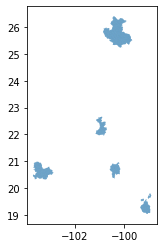

In [3]:
tianguis_prox.plot()

In [4]:
tianguis_prox = tianguis_prox.loc[tianguis_prox.metropolis != 'Tecamac']

### Population

In [5]:
hex_id = str(tuple(tianguis_prox.hex_id_8.unique()))

schema = 'censo'
table = 'hex_bins_pop_2020'

cve_column = 'hex_id_8'

query = f'SELECT * FROM {schema}.{table} WHERE "{cve_column}" IN {hex_id}'

In [6]:
hex_pop = aup.gdf_from_query(query)
print(hex_pop.shape)
hex_pop.head(2)

(4748, 225)


,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic
0,"POLYGON ((-99.14706 19.31914, -99.14254 19.322...",88499585cbfffff,09003,14728.182,7714.6570,7013.5234,439.12384,215.08902,224.03480,14288.545,...,2890.2876,3947.6900,3214.1108,1863.4669,1352.5583,873.4828,59.22533,119.67361,918.1871,7.874418
1,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",884995b8c1fffff,09002,14474.150,7629.7427,6844.4077,397.12970,201.98712,195.14255,14076.893,...,3291.8496,4331.3076,3775.7168,2321.4470,1888.8503,1201.4825,62.35107,83.08192,683.6730,5.065773


<AxesSubplot:>

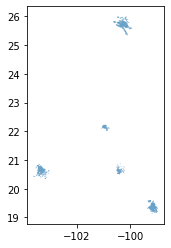

In [7]:
hex_pop.plot()

### Marginalization

In [8]:
schema = 'censo'
table = 'hex_bins_marg_2020'
query = f'SELECT * FROM {schema}.{table} WHERE "{cve_column}" IN {hex_id}'

In [9]:
hex_marg = aup.gdf_from_query(query)
print(hex_marg.shape)
hex_marg.head(2)

(4581, 17)


,geometry,hex_id_8,CVEGEO,pobtot,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",884995b8c1fffff,09002,14474.150,11.159615,39.639160,60.006165,0.094840,0.109755,0.752394,0.921807,8.358856,45.407722,16.135150,54.746320,123.545098,0.965088
1,"POLYGON ((-99.17884 19.50300, -99.17848 19.497...",884995b88dfffff,09002,5324.688,12.022201,22.668638,27.020708,0.101111,0.016225,5.099980,1.091457,5.453633,28.146427,7.906191,28.952435,123.916076,0.967986


In [10]:
hex_marg['Grado_Marg'] = np.nan
hex_marg.loc[hex_marg.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_marg.loc[(hex_marg.imn_2020>=0.946436 )&
             (hex_marg.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_marg.loc[(hex_marg.imn_2020>=0.926536)&
             (hex_marg.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_marg.loc[(hex_marg.imn_2020>=0.8999)&
             (hex_marg.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_marg.loc[hex_marg.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

<AxesSubplot:>

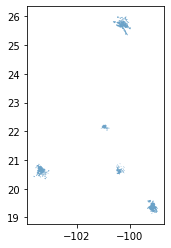

In [11]:
hex_marg.plot()

### Proximity

In [12]:
schema = 'prox_analysis'
table = 'time_15_min_analysis_hexres8'
query = f'SELECT * FROM {schema}.{table} WHERE "{cve_column}" IN {hex_id}'

In [13]:
hex_prox = aup.gdf_from_query(query)
print(hex_prox.shape)
hex_prox.head(2)

(4748, 30)


,hex_id_8,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,max_asistencia social,...,max_idx_15_min,pobtot,pobfem,pobmas,pob_0a14,pob_15a24,pob_25a59,p_60ymas,dens_pobha,city
0,884995b8c1fffff,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",6.623125,6.623125,4.627151,5.464316,5.596038,4.202571,4.806037,5.596038,...,12.234039,14474.150,7629.7427,6844.4077,2373.83695,2064.68177,7643.225,2392.2773,171.500705,ZMVM
1,884995b81bfffff,"POLYGON ((-99.16726 19.47282, -99.17215 19.475...",14.630789,4.613896,4.614089,14.630789,12.109491,3.710320,12.109491,9.082724,...,22.818648,12379.193,6647.6950,5731.5000,1686.68495,1519.17955,6235.589,2935.5679,146.694621,ZMVM


<AxesSubplot:>

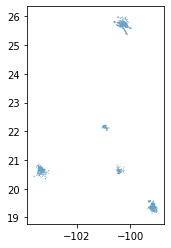

In [14]:
hex_prox.plot()

## Merge data

In [15]:
hex_merge = hex_pop[['hex_id_8','pobtot','graproes','geometry']].merge(tianguis_prox[['hex_id_8','time','metropolis']],
                                                                      on='hex_id_8')
hex_merge = hex_merge.merge(hex_marg[['hex_id_8','imn_2020','Grado_Marg']],
                           on='hex_id_8')

hex_prox_cols = [x for x in list(hex_prox.columns) if 'max' in x]
hex_prox_cols.append('hex_id_8')

hex_merge = hex_merge.merge(hex_prox[hex_prox_cols], on='hex_id_8')

print(hex_merge.shape)
hex_merge.head(2)

(4580, 27)


,hex_id_8,pobtot,graproes,geometry,time,metropolis,imn_2020,Grado_Marg,max_escuelas,max_preescolar,...,max_alimentos,max_personal,max_farmacias,max_hogar,max_complementarios,max_entretenimiento,max_social,max_actividad física,max_cultural,max_idx_15_min
0,88499585cbfffff,14728.182,11.412740,"POLYGON ((-99.14706 19.31914, -99.14254 19.322...",6.727075,CDMX,0.954376,Bajo,12.350514,7.252843,...,1.424517,2.279245,2.807629,3.622629,3.468249,21.428075,21.428075,9.480829,14.729776,21.428075
1,884995b8c1fffff,14474.150,12.157718,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",8.802200,CDMX,0.965088,Bajo,6.623125,6.623125,...,0.876679,2.069707,3.621216,3.200015,2.219315,12.234039,7.078973,5.574736,12.234039,12.234039


### Name data treatment

In [16]:
def city_names(city):
    if city == 'Atizapan':
        city == 'Atizapán'
    elif city == 'CDMX':
        city = 'Ciudad de México'
    elif city == 'AMG':
        city = 'Área Metropolitana de Guadalajara'
    elif city == 'AMM':
        city = 'Zona Metropolitana de Monterrey'
    elif city == 'SLP':
        city = 'San Luis Potosí'
    elif city == 'Queretaro':
        city = 'Querétaro'
    return city

In [17]:
hex_merge['metropolis'] = hex_merge.metropolis.apply(city_names)
hex_merge.loc[hex_merge.metropolis=='Atizapan','metropolis'] = 'Atizapán'


In [18]:
import textwrap
def wrap_labels(ax, width, rotation, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=rotation)

## Univariate analysis

Text(0, 0.5, 'Tiempo a tianguis (min)')

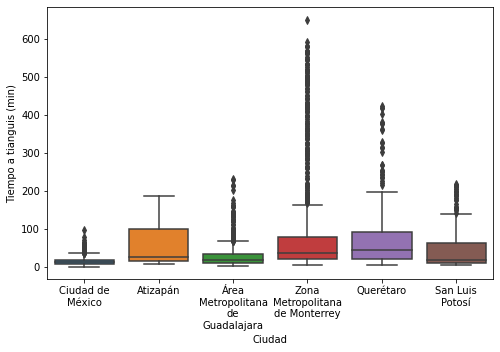

In [19]:
fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(x=np.array(hex_merge.metropolis) , y=np.array(hex_merge.time), ax=ax)

wrap_labels(ax, 12, 0)

plt.xlabel('Ciudad')
plt.ylabel('Tiempo a tianguis (min)')

<AxesSubplot:xlabel='metropolis', ylabel='time'>

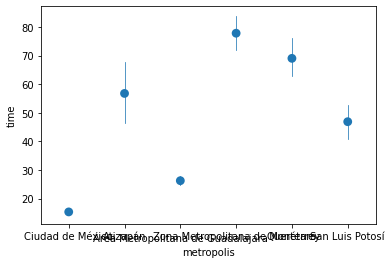

In [20]:
sns.pointplot(data=hex_merge, x="metropolis", y="time", 
              join=False, errorbar='sd',estimator=np.mean, errwidth=0.75)

<AxesSubplot:xlabel='metropolis', ylabel='time'>

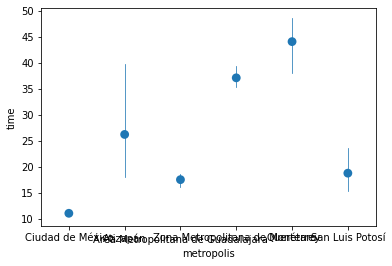

In [21]:
sns.pointplot(data=hex_merge, x="metropolis", y="time", 
              join=False,estimator=np.median, errwidth=0.75)

In [22]:
hex_merge['wgt_time_tianguis'] =(hex_merge['time'] * hex_merge['pobtot'])/hex_merge.groupby('metropolis')['pobtot'].transform('sum')
df_wgt_avg = hex_merge[['metropolis','wgt_time_tianguis']].groupby('metropolis').sum()
df_wgt_avg = df_wgt_avg.reset_index()
df_wgt_avg = df_wgt_avg.reset_index()
df_wgt_avg

,index,metropolis,wgt_time_tianguis
0,0,Atizapán,20.032219
1,1,Ciudad de México,10.264773
2,2,Querétaro,37.314554
3,3,San Luis Potosí,20.707451
4,4,Zona Metropolitana de Monterrey,35.633644
5,5,Área Metropolitana de Guadalajara,14.721920


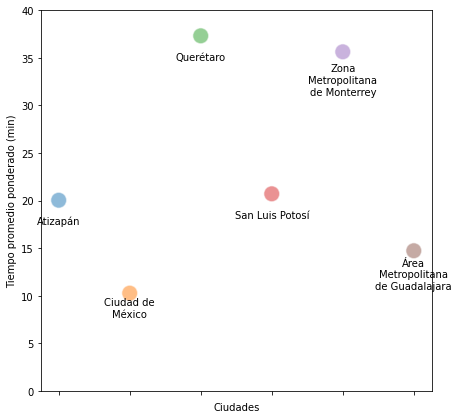

In [23]:
fig,ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=df_wgt_avg, x=df_wgt_avg.metropolis, y=df_wgt_avg.wgt_time_tianguis,
                s=(250), alpha=0.5,
               hue = 'metropolis', legend=False, ax=ax)
ax.set(xticklabels=[])
plt.xlabel('Ciudades')
plt.ylabel('Tiempo promedio ponderado (min)')
plt.ylim(0,40)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == 'Zona Metropolitana de Monterrey':
            ax.text(point['x'], point['y']-4.5, textwrap.fill(point['val'], width=15,
                          break_long_words=False), ha='center')
        elif point['val'] == 'Área Metropolitana de Guadalajara':
            ax.text(point['x'], point['y']-4, textwrap.fill(point['val'], width=15,
                          break_long_words=False), ha='center')
        else:
            ax.text(point['x'], point['y']-2.5, textwrap.fill(point['val'], width=15,
                          break_long_words=False), ha='center')

label_point(df_wgt_avg['index'], df_wgt_avg.wgt_time_tianguis, df_wgt_avg.metropolis, plt.gca())

## Time analysis

In [24]:
def tianguis_time_groups(time_column):
    if time_column <= 15:
        time_group = '0-15min'
    elif time_column <= 30:
        time_group = '15-30min'
    elif time_column <= 45:
        time_group = '30-45min'
    elif time_column <= 60:
        time_group = '45-60min'
    else:
        time_group = '> 60min'
    return time_group

In [25]:
hex_merge['time_group'] = hex_merge.time.apply(tianguis_time_groups)

In [26]:
hex_group = hex_merge.groupby(['metropolis','time_group']).sum()
hex_group = hex_group['pobtot'].copy()
hex_group = hex_group.reset_index()
hex_group['pct_pobtot'] = 100 * hex_group['pobtot'] / hex_group.groupby('metropolis')['pobtot'].transform('sum')

/tmp/ipykernel_21218/4132438130.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hex_group = hex_merge.groupby(['metropolis','time_group']).sum()


In [27]:
# hex_group.loc[len(hex_group)+1] = ['Atizapán','0-5min',0.0,0.0]
# hex_group.loc[len(hex_group)+1] = ['Querétaro','0-5min',0.0,0.0]

In [28]:
from pandas.api.types import CategoricalDtype

In [29]:
#categorical data
cat_list = ['0-15min','15-30min','30-45min', 
            '45-60min','> 60min']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_group['time_group'] = hex_group['time_group'].astype(cat_size_order)
hex_group = hex_group.sort_values('time_group')

In [30]:
hex_group.head(5)

,metropolis,time_group,pobtot,pct_pobtot
0,Atizapán,0-15min,3.253195e+05,61.336314
20,Zona Metropolitana de Monterrey,0-15min,1.912808e+06,36.347499
25,Área Metropolitana de Guadalajara,0-15min,3.667846e+06,71.874066
5,Ciudad de México,0-15min,7.982489e+06,86.977230
15,San Luis Potosí,0-15min,9.086283e+05,76.156570


<AxesSubplot:xlabel='time_group', ylabel='pct_pobtot'>

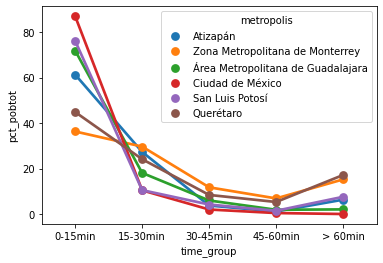

In [31]:
sns.pointplot(data=hex_group, x="time_group", y="pct_pobtot", hue='metropolis')

In [32]:
hex_group['Porcentaje de población acumulada (%)'] = hex_group.groupby('metropolis')['pct_pobtot'].transform(pd.Series.cumsum)

<AxesSubplot:xlabel='time_group', ylabel='Porcentaje de población acumulada (%)'>

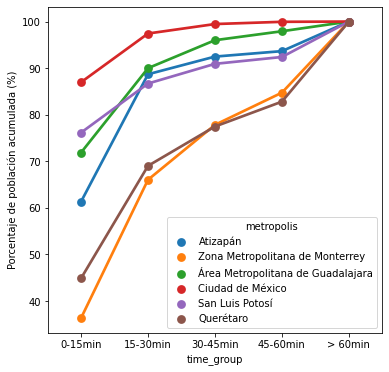

In [33]:
fig,ax = plt.subplots(figsize=(6,6))

sns.pointplot(data=hex_group, x="time_group", y='Porcentaje de población acumulada (%)'
              , hue='metropolis',
             ax=ax)

## Bivariate analysis

### Time vs marginalization

In [34]:
#categorical data
cat_list = ['Muy bajo','Bajo','Medio','Alto', 'Muy alto']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_merge['Grado_Marg'] = hex_merge['Grado_Marg'].astype(cat_size_order)
hex_merge = hex_merge.sort_values('Grado_Marg')

<AxesSubplot:xlabel='Grado_Marg', ylabel='time'>

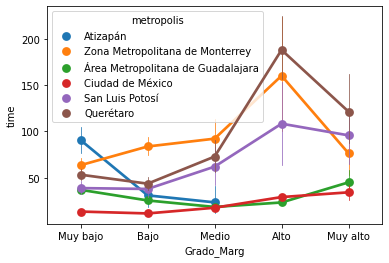

In [35]:
sns.pointplot(data=hex_merge, x="Grado_Marg", y="time", 
              hue='metropolis',errorbar='sd',estimator=np.mean, errwidth=0.75)

<AxesSubplot:xlabel='Grado_Marg', ylabel='time'>

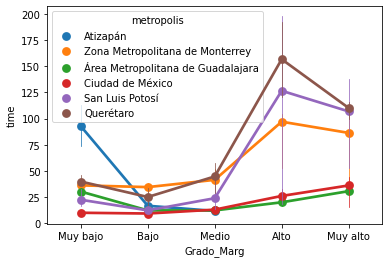

In [36]:
sns.pointplot(data=hex_merge, x="Grado_Marg", y="time", 
              hue='metropolis',errorbar='sd',estimator=np.median, errwidth=0.75)

### Time vs time to food

<AxesSubplot:xlabel='max_alimentos', ylabel='time'>

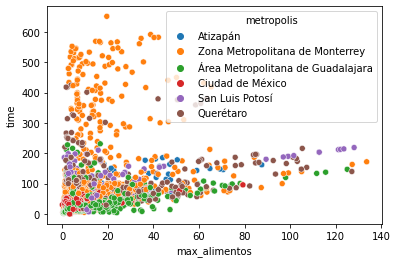

In [37]:
sns.scatterplot(data=hex_merge, x='max_alimentos', y='time',
               hue='metropolis')

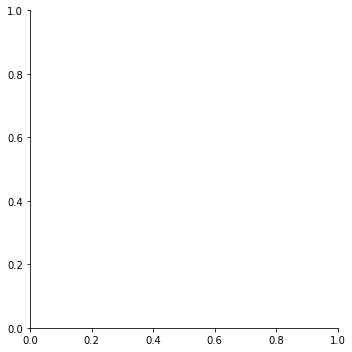

In [38]:
hex_city = hex_merge.loc[hex_merge.metropolis=='AMG']
sns.displot(hex_city, x='max_alimentos', y='time')

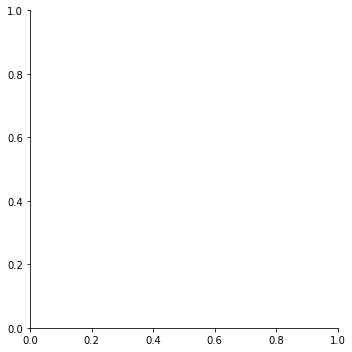

In [39]:
hex_city = hex_merge.loc[hex_merge.metropolis=='CDMX']
sns.displot(hex_city, x='max_alimentos', y='time')

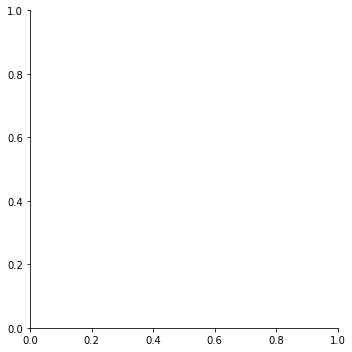

In [40]:
hex_city = hex_merge.loc[hex_merge.metropolis=='AMM']
sns.displot(hex_city, x='max_alimentos', y='time')

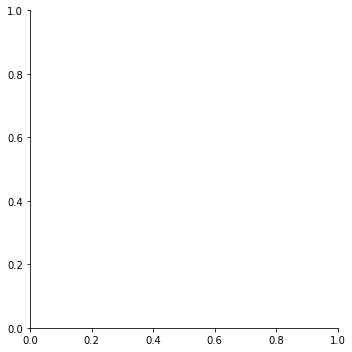

In [41]:
hex_city = hex_merge.loc[hex_merge.metropolis=='Queretaro']
sns.displot(hex_city, x='max_alimentos', y='time')

### Time to tianguis vs general proximity

<AxesSubplot:xlabel='max_idx_15_min', ylabel='time'>

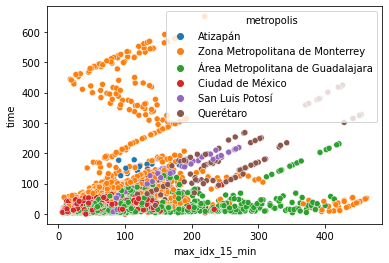

In [42]:
sns.scatterplot(data=hex_merge, x='max_idx_15_min', y='time',
               hue='metropolis')

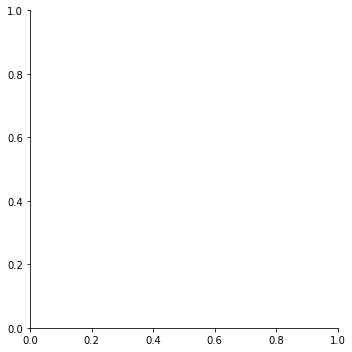

In [43]:
hex_city = hex_merge.loc[hex_merge.metropolis=='AMG']
sns.displot(hex_city, x='max_idx_15_min', y='time')

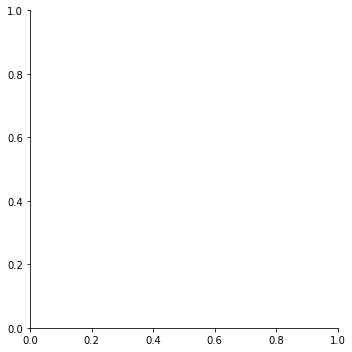

In [44]:
hex_city = hex_merge.loc[hex_merge.metropolis=='AMM']
sns.displot(hex_city, x='max_idx_15_min', y='time')

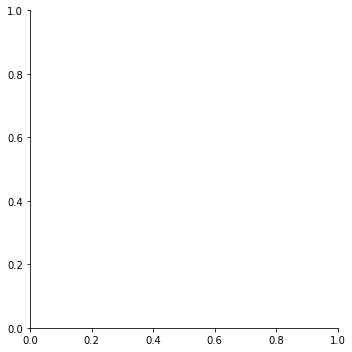

In [45]:
hex_city = hex_merge.loc[hex_merge.metropolis=='CDMX']
sns.displot(hex_city, x='max_idx_15_min', y='time')

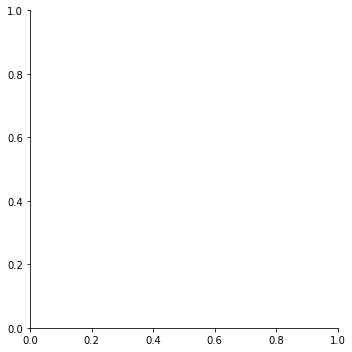

In [46]:
hex_city = hex_merge.loc[hex_merge.metropolis=='Queretaro']
sns.displot(hex_city, x='max_idx_15_min', y='time')

## Distance map

In [34]:
#categorical data
cat_list = ['0-15min','15-30min','30-45min', 
            '45-60min','> 60min']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_merge['time_group'] = hex_merge['time_group'].astype(cat_size_order)
hex_merge = hex_merge.sort_values('time_group')

In [48]:
def comparing_proximity_plot(city):
    fig,ax = plt.subplots(1,4, figsize=(8,5),
                          gridspec_kw={"width_ratios":[0.32,0.32,0.32, 0.01]})

    ### adding colorbar
    #gs = ax[1, 1].get_gridspec()
    #for axis in ax[1,:]:
        axis.remove()

    #axbig = fig.add_subplot(gs[1,:])


    hex_merge.loc[hex_merge.metropolis==city].plot('time', cmap='viridis_r',ax=ax[0,0],
                                                                vmin=0,vmax=60,
                                                                cax=ax[3], legend=True
                                                                 , legend_kwds={'label': "Tiempo (min)",'orientation': "horizontal"})
    hex_merge.loc[hex_merge.metropolis==city].plot('max_alimentos',cmap='viridis_r',ax=ax[0,1],
                                                                 vmin=0,vmax=60,)
    hex_merge.loc[hex_merge.metropolis==city].plot('max_idx_15_min',cmap='viridis_r',ax=ax[0,2],
                                                                 vmin=0,vmax=60,)

    ax[0,0].title.set_text('Tianguis')
    ax[0,1].title.set_text('Comercios de alimentos')
    ax[0,2].title.set_text('Índice de 15 minutos')
    ax[0,0].axes.get_xaxis().set_visible(False)
    ax[0,0].axes.get_yaxis().set_visible(False)
    ax[0,1].axes.get_xaxis().set_visible(False)
    ax[0,1].axes.get_yaxis().set_visible(False)
    ax[0,2].axes.get_xaxis().set_visible(False)
    ax[0,2].axes.get_yaxis().set_visible(False)


    plt.tight_layout()

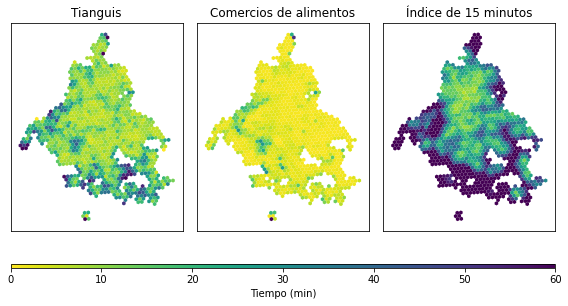

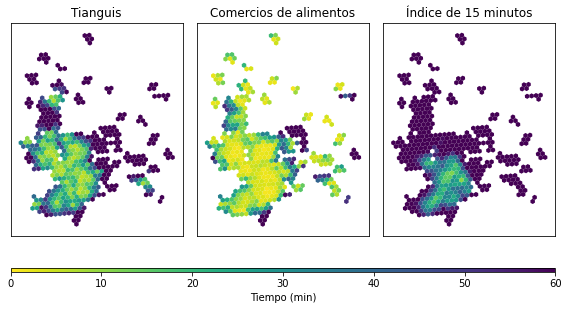

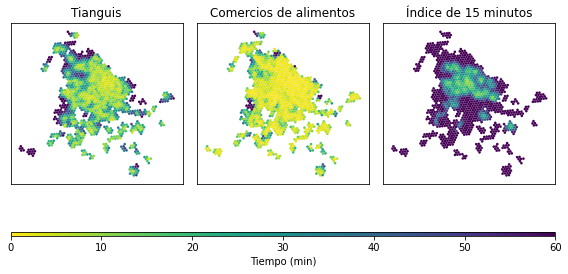

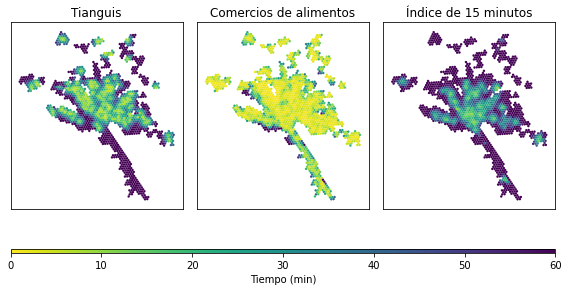

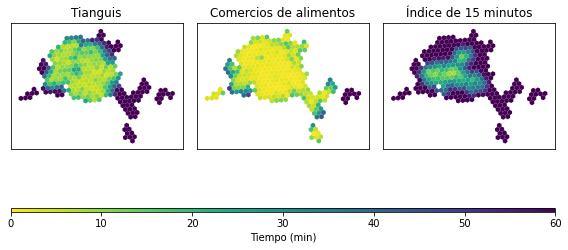

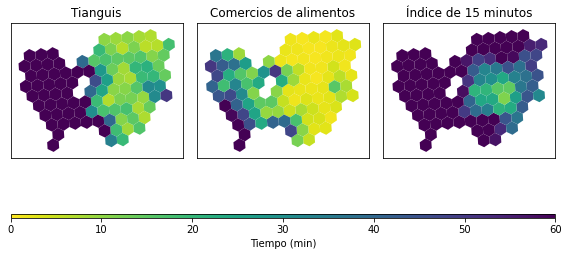

In [49]:
for city in hex_merge.metropolis.unique():
    comparing_proximity_plot(city)

In [43]:
def comparing_proximity_plot(city):
    fig,ax = plt.subplots(1,4, figsize=(10,4),
                          gridspec_kw={"width_ratios":[0.32,0.32,0.32, 0.01]})
    
    poly =  hex_merge.loc[hex_merge.metropolis==city].geometry
    # Extracts coordinates from polygon as DataFrame
    coord_val = poly.bounds
    # Gets coordinates for bounding box
    ymax = coord_val.maxy.max()-0.02
    ymin = coord_val.miny.min()+0.02
    xmax = coord_val.maxx.max()+0.02
    ymin = coord_val.minx.min()-0.02
    
    G = ox.graph_from_bbox(ymax,ymin, xmax, xmin)
    edges = ox.graph_to_gdfs(G, nodes=False)


    hex_merge.loc[hex_merge.metropolis==city].plot('time', cmap='viridis_r',ax=ax[0],
                                                                vmin=0,vmax=60,
                                                                cax=ax[3], legend=True
                                                                 , legend_kwds={'label': "Tiempo (min)",'orientation': "vertical"})
    edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=ax[0], color='#e8e9eb',linewidth=0.5, zorder=2)
    
    
    hex_merge.loc[hex_merge.metropolis==city].plot('max_alimentos',cmap='viridis_r',ax=ax[1],
                                                                 vmin=0,vmax=60,)
    edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=ax[1], color='#e8e9eb',linewidth=0.5, zorder=2)
    
    
    hex_merge.loc[hex_merge.metropolis==city].plot('max_idx_15_min',cmap='viridis_r',ax=ax[2],
                                                                 vmin=0,vmax=60,)
    edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=ax[2], color='#e8e9eb',linewidth=0.5, zorder=2)

    ax[0].title.set_text('Tianguis')
    ax[1].title.set_text('Comercios de alimentos')
    ax[2].title.set_text('Índice de 15 minutos')
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].axes.get_yaxis().set_visible(False)
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_yaxis().set_visible(False)
    ax[2].axes.get_xaxis().set_visible(False)
    ax[2].axes.get_yaxis().set_visible(False)


    plt.tight_layout()

In [45]:
comparing_proximity_plot('Querétaro')

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

In [ ]:
gdf_aq = gdf_aq.to_crs("EPSG:4326")
    xmin = gdf_aq.loc[gdf_aq.group==g].geometry.x.min()-0.02
    xmax = gdf_aq.loc[gdf_aq.group==g].geometry.x.max()+0.02
    ymin = gdf_aq.loc[gdf_aq.group==g].geometry.y.min()-0.02
    ymax = gdf_aq.loc[gdf_aq.group==g].geometry.y.max()+0.02
    G = ox.graph_from_bbox(ymax,ymin, xmax, xmin)
    edges = ox.graph_to_gdfs(G, nodes=False)
    traj_aq = mpd.Trajectory(gdf_aq.loc[gdf_aq.group==g], 1)

    xdif = xmax-xmin
    ydif = ymax-ymin

    ratio = ydif/xdif

    if ratio > 1:
        size = (int(8*ratio),8)
    else:
        size = (8, int(8/ratio))

    fig, axes = plt.subplots(1,1,figsize=size)

    fig.suptitle(f'Trip: {n}', fontsize=20)

    date = pd.to_datetime(gdf_aq.loc[gdf_aq.group==g]['date'],errors='coerce', unit='s')
    date = date.dt.strftime("%Y-%m-%d")

    axes.set_title(f'Sensor: {sensor}\n{date.unique()[0]}', fontsize=15)

    axes.grid(False)

    edges.plot(ax=axes, color='#e8e9eb',linewidth=0.1, zorder=-1)
    edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=axes, color='#e8e9eb',linewidth=0.5, zorder=0)
    traj_aq.plot(ax=axes, column=pi, linewidth=4, capstyle='round', zorder=1)
    axes.axis('off')
    
    if save==True:
        plt.savefig(f'Sensor: {sensor}\n{date.unique()[0]}.png', dpi=300)
    
    return plt.show()